# Pyber Ride Sharing

# Analysis
    1. From the scatter plot we can conclude that the higher the number of drivers there are in a city type, the less the average fare will be in that city type.
    2. The Total Rides by City Type shows that Urban is the city type with the most rides (68.4%), followed by Suburban(26.3%) and Rural having the lowest share of rides (5.3%)
    3. The scatter plot shows that the number of rides for each city type clusters around a different area:
        Urban clusters around the 20 to 30 rides, Suburban around the 15 to 20 rides and Rural around 5 to 10 rides.

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#use ; sns.set() and sns.set_color_codes() to set the background
import seaborn as sns; sns.set()
sns.set_color_codes()

#read the data files and set them to variables
city_data = pd.read_csv("raw_data/city_data.csv")
ride_data = pd.read_csv("raw_data/ride_data.csv")

#group the ride_data by city
ride_data_grouped = ride_data.groupby("city")

#merged the two data frames into one on "city"
merged_data_frames = pd.merge(ride_data, city_data, on="city")
# merged_data_frames.head(2)

# Bubble Plot of Ride Sharing Data

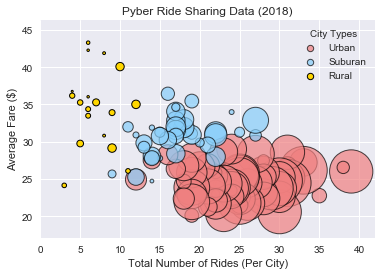

In [2]:
#Create a new data frame to use to create a scatter plot for the data

# find the total number of rides in each city by using value_counts() on the 'city' column in the merged data frame
ridesPerCity = merged_data_frames["city"].value_counts()
#turn this into a dataframe
ridesPerCity = pd.DataFrame(ridesPerCity)
#rename the 'city' column in the new data frame to something that makes more sense
ridesPerCity = ridesPerCity.rename(columns={"city":"Total Rides"})
ridesPerCity

#find the total fare for each city
#first, create a variable using merged_data_frames grouped by 'city'
groupedFare = merged_data_frames.groupby(by="city")
#then create a new variable using the last steps sum
farePerCity = groupedFare.sum()
#take onlt the 'fare' column
farePerCity = farePerCity["fare"]
#and convert back to a data frame
farePerCity = pd.DataFrame(farePerCity)
#rename the 'fare' column to 'Total Fare' so it is clear what is in the column
farePerCity = farePerCity.rename(columns={"fare":"Total Fare"})
#remove the index name
del farePerCity.index.name

#add total rides to the new dataframe by using merge on it and the ridesPerCity created earlier, merging based on the index
fareAndTotalRidesPerCity = pd.merge(ridesPerCity,farePerCity,left_index=True, right_index=True )
#find the average fare per city by diving 'Total Fare' by "Total Rides" and adding the values to a new column
fareAndTotalRidesPerCity["Average Fare"] = fareAndTotalRidesPerCity["Total Fare"]/fareAndTotalRidesPerCity["Total Rides"]
fareAndTotalRidesPerCity

#add the total drivers in a city to the data frame by using .sum() on the groupedFare groupby object
driversPerCity = groupedFare.sum()
#take only the "drivers_count" column
driversPerCity = driversPerCity["driver_count"]
#convert back to a data frame
driversPerCity = pd.DataFrame(driversPerCity)
#merge this data frame to the data frame containg fare and total rides by the index
ridesFareDrivers = pd.merge(fareAndTotalRidesPerCity,driversPerCity,left_index=True, right_index=True )

#add the city type to each city in the large data frame by setting a variable equal to the groupedFare groupby object.first(),
#to find the first string that appears for each city type
cityType = groupedFare.first()
#take only the 'type' column
cityType = cityType["type"]
#convert back to a data frame
cityType = pd.DataFrame(cityType)
#merge this data frame to the data frame containg fare, total rides and total drivers by the index
ridesFareDriversType = pd.merge(ridesFareDrivers,cityType,left_index=True, right_index=True )
ridesFareDriversType.head()

#Use the created data frame to create 3 different data frames, one for each city type
urba = ridesFareDriversType.loc[ridesFareDriversType["type"]=="Urban"]
subur = ridesFareDriversType.loc[ridesFareDriversType["type"]=="Suburban"]
rura = ridesFareDriversType.loc[ridesFareDriversType["type"]=="Rural"]

#use the 3 split data frames to plot the data in a scatter
#Set the colors for each to be from the Pyber colors, the size of each to be based on the number of drivers, 
#set the alpha to be slightly transparent so it can be seen if any data is overlapping
#set edge colors to black and their linewidths to 1 so that they can easily be seen. and set the label to be used later
urban = plt.scatter(urba["Total Rides"], urba["Average Fare"], c='lightcoral', s= urba["driver_count"],
                    alpha = .7, edgecolors="black", label="Urban", linewidths=1 )
suburban = plt.scatter(subur["Total Rides"], subur["Average Fare"], c='lightskyblue', s= subur["driver_count"],
                    alpha = .7, edgecolors="black", label="Suburan", linewidths=1 )
rural = plt.scatter(rura["Total Rides"], rura["Average Fare"], c='gold', s= rura["driver_count"],
                    alpha = 1, edgecolors="black", label="Rural", linewidths=1 )


#create a legend for the scatter using the labels set before, add a title, let matplotlib find the best location for it
#use scatterpoints to set the size of the labels to be the same
lgnd = plt.legend(handles=[urban, suburban, rural], loc="best", title= "City Types")

#use a for loop to go through each key in the legend and set each size so they are all the same
for handle in lgnd.legendHandles:
    handle.set_sizes([40])

#add a chart title as well as x and y labels
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")

#Set the chart limits to be slightly larger than the data so it can all be seen clearly
plt.xlim(min(ridesFareDriversType["Total Rides"])-3, max(ridesFareDriversType["Total Rides"]+3))
plt.ylim(min(ridesFareDriversType["Average Fare"]-3), max(ridesFareDriversType["Average Fare"]+3))

#show the completed scatter
plt.show()

# Total Fares by City Type

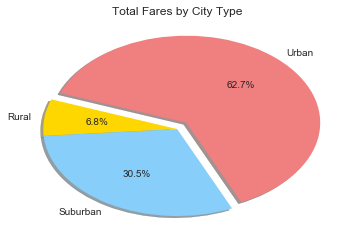

In [3]:
#create Pie charts to look at how each city type compares
#create a varable grouping the merged_data_frames by 'type'
mergedType = merged_data_frames.groupby("type")
#find the fare for each city type by using .sum() on the "fare" column in the created variable and set the findings to a new var
fare_by_city_type = mergedType["fare"].sum()
#set to a variable each unique name in type and order them alphabetically so the colors match the city types
cityType = sorted(city_data["type"].unique())
#create a variable for the colors to be used for each Pie chart
colors=["gold", "lightskyblue", "lightcoral"]

#after seeing the plotted chart come back and set the largest city type to explode
explode = [0,0,0.10]

#plot the chart using the created variables, also include shadow to make the chart easier to see
#set autopct to "%1.1f%%" so that each section will have it's % of the total displayed to one decimal place
#use startangle to tun the chart
plt.pie(fare_by_city_type, labels=cityType,colors=colors,shadow=True, autopct="%1.1f%%", startangle=160, explode=explode )

#give the chart a title
plt.title("Total Fares by City Type")
#show the chart
plt.show()

# Total Rides by City Type 

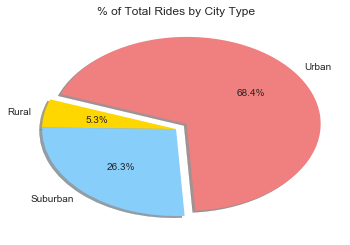

In [4]:
#use mergedType created eariler but this time take the count of it's "ride_id" column
#sort it alphabetically so the colors match the correct city types
count_by_city_type = sorted(mergedType["ride_id"].count())

#Use the new variable for the count of rides in a city type and the formatting varabiles from the previous Pie chart
#to create a new Pie chart

plt.pie(count_by_city_type, labels=cityType,colors=colors,shadow=True, autopct="%1.1f%%", startangle=160, explode=explode )

#Give the pie chart a title
plt.title("% of Total Rides by City Type")
#show the chart
plt.show()

# Total Drivers by City Type

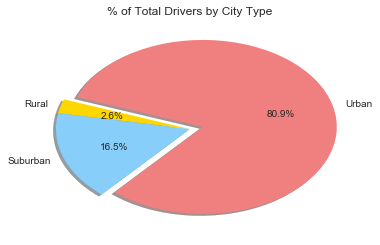

In [5]:
#use just the city_data data set to find the total drivers by city type

#find the number of drivers in each city type by grouping by type and using.sum() and set to a variable
cityDrivers = city_data.groupby("type").sum()

#find the total number of drivers in each city type by using the "driver_count" column from the variable
#sort it alphabetically so the colors match the correct city types
totdrivers = sorted(cityDrivers["driver_count"])


#Use the new variable for the total drivers in a city type and the formatting varabiles from the first Pie chart
#to create a new pie chart
plt.pie(totdrivers, labels=cityType, colors=colors,shadow=True, autopct="%1.1f%%", startangle=160, explode=explode)

#add a title to the chart and display it
plt.title("% of Total Drivers by City Type")
#show the pie chart
plt.show()